<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/02_intro_to_prophet_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Prophet Assignment

#### Deleverables
- Pick a timeseries dataset
    - Ideas
        - [Yellow cab averages](https://raw.githubusercontent.com/gumdropsteve/datasets/master/yellow_cab_ymd_averages.csv)
            - some columns here have wacky values
        - [warobson Medium views](https://raw.githubusercontent.com/gumdropsteve/datasets/master/views.csv)
        - [$BRK-B stock](https://github.com/gumdropsteve/datasets/blob/master/stocks/BRK-B.csv)
    - Adjust the dataset so it's ready for Prophet
        - i.e. make sure you have columns `ds` (date) and `y` (target)  
- Make a basic Prophet model
- Forecast n periods
    - Pick n based on what makes sense for your data
- Visualize your forecast
- Examine your components
    - What's going on?
- Cross validate your forecast

#### Resources
- [Intro to Prophet repo](https://github.com/gumdropsteve/intro_to_prophet 
)
- [warobson Prophet blog posts](https://gumdropsteve.github.io/blog/docs/ds/prophet 
)
- [Prophet docs](https://facebook.github.io/prophet 
)
- [Prophet paper](https://peerj.com/preprints/3190/ 
)

Make a basic Prophet model

In [23]:
from fbprophet import Prophet

m = Prophet()

In [2]:
import pandas as pd

In [18]:
# your stuff here
link = 'https://github.com/gumdropsteve/datasets/raw/master/stocks/TSLA.csv'
df = pd.read_csv(link)

In [19]:
df

,ds,opening_price,high,low,close,adj_close,volume
0,2010-11-17,6.040000,6.150000,5.722000,5.898000,5.898000,3750000
1,2010-11-18,6.134000,6.148000,5.784000,5.978000,5.978000,4780500
2,2010-11-19,6.032000,6.274000,5.940000,6.198000,6.198000,5752500
3,2010-11-22,6.314000,6.690000,6.300000,6.680000,6.680000,7648500
4,2010-11-23,6.658000,7.136000,6.438000,6.914000,6.914000,7889000
...,...,...,...,...,...,...,...
2512,2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
2513,2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2514,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
2515,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100


In [21]:
df = df[['ds', 'adj_close']]

df.columns = ['ds', 'y']

df

,ds,y
0,2010-11-17,5.898000
1,2010-11-18,5.978000
2,2010-11-19,6.198000
3,2010-11-22,6.680000
4,2010-11-23,6.914000
...,...,...
2512,2020-11-10,410.359985
2513,2020-11-11,417.130005
2514,2020-11-12,411.760010
2515,2020-11-13,408.500000


In [24]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast n periods

In [25]:
future = m.make_future_dataframe(periods=365)

In [26]:
future

,ds
0,2010-11-17
1,2010-11-18
2,2010-11-19
3,2010-11-22
4,2010-11-23
...,...
2877,2021-11-12
2878,2021-11-13
2879,2021-11-14
2880,2021-11-15


In [27]:
forecast = m.predict(future)

In [28]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-11-17,5.820625,-36.266157,51.828208,5.820625,5.820625,2.507397,2.507397,2.507397,0.085841,0.085841,0.085841,2.421556,2.421556,2.421556,0.0,0.0,0.0,8.328022
1,2010-11-18,5.823850,-37.230231,53.972081,5.823850,5.823850,1.494673,1.494673,1.494673,0.007990,0.007990,0.007990,1.486683,1.486683,1.486683,0.0,0.0,0.0,7.318523
2,2010-11-19,5.827075,-36.319231,50.089541,5.827075,5.827075,0.255999,0.255999,0.255999,-0.304068,-0.304068,-0.304068,0.560067,0.560067,0.560067,0.0,0.0,0.0,6.083074
3,2010-11-22,5.836752,-42.570258,45.968647,5.836752,5.836752,-1.674294,-1.674294,-1.674294,0.382071,0.382071,0.382071,-2.056365,-2.056365,-2.056365,0.0,0.0,0.0,4.162457
4,2010-11-23,5.839977,-43.501326,46.359221,5.839977,5.839977,-3.060996,-3.060996,-3.060996,-0.222009,-0.222009,-0.222009,-2.838986,-2.838986,-2.838986,0.0,0.0,0.0,2.778981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,2021-11-12,434.043823,387.762273,491.704877,410.554701,453.693858,6.319278,6.319278,6.319278,-0.304068,-0.304068,-0.304068,6.623346,6.623346,6.623346,0.0,0.0,0.0,440.363101
2878,2021-11-13,434.438005,389.265900,488.617294,410.836745,454.207768,5.828748,5.828748,5.828748,0.025088,0.025088,0.025088,5.803660,5.803660,5.803660,0.0,0.0,0.0,440.266752
2879,2021-11-14,434.832187,385.825766,491.946185,411.118790,454.711316,4.965117,4.965117,4.965117,0.025088,0.025088,0.025088,4.940029,4.940029,4.940029,0.0,0.0,0.0,439.797304
2880,2021-11-15,435.226369,386.897051,486.615789,411.400834,455.187558,4.424348,4.424348,4.424348,0.382071,0.382071,0.382071,4.042277,4.042277,4.042277,0.0,0.0,0.0,439.650716


In [30]:
forecast.sample(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2222,2019-09-18,124.216788,93.913887,183.693655,124.216788,124.216788,12.006427,12.006427,12.006427,0.085841,0.085841,0.085841,11.920587,11.920587,11.920587,0.0,0.0,0.0,136.223216
2336,2020-03-03,190.045179,140.078858,230.051629,190.045179,190.045179,-4.013343,-4.013343,-4.013343,-0.222009,-0.222009,-0.222009,-3.791333,-3.791333,-3.791333,0.0,0.0,0.0,186.031836
1441,2016-08-10,48.302350,9.548054,97.119398,48.302350,48.302350,5.423587,5.423587,5.423587,0.085841,0.085841,0.085841,5.337747,5.337747,5.337747,0.0,0.0,0.0,53.725937
23,2010-12-21,5.930287,-45.714824,42.291172,5.930287,5.930287,-4.527601,-4.527601,-4.527601,-0.222009,-0.222009,-0.222009,-4.305592,-4.305592,-4.305592,0.0,0.0,0.0,1.402686
2558,2020-12-28,308.299772,258.371652,345.745449,308.227412,308.509124,-4.981945,-4.981945,-4.981945,0.382071,0.382071,0.382071,-5.364016,-5.364016,-5.364016,0.0,0.0,0.0,303.317827
217,2011-09-28,6.836621,-21.522671,62.705608,6.836621,6.836621,13.167844,13.167844,13.167844,0.085841,0.085841,0.085841,13.082003,13.082003,13.082003,0.0,0.0,0.0,20.004465
2634,2021-03-14,338.257602,282.425948,373.707582,335.474863,341.751167,-9.965008,-9.965008,-9.965008,0.025088,0.025088,0.025088,-9.990096,-9.990096,-9.990096,0.0,0.0,0.0,328.292594
664,2013-07-11,22.713579,-18.135386,74.515392,22.713579,22.713579,4.300694,4.300694,4.300694,0.007990,0.007990,0.007990,4.292704,4.292704,4.292704,0.0,0.0,0.0,27.014273
2071,2019-02-12,38.285117,-7.774891,86.116361,38.285117,38.285117,-2.038554,-2.038554,-2.038554,-0.222009,-0.222009,-0.222009,-1.816545,-1.816545,-1.816545,0.0,0.0,0.0,36.246563
2589,2021-01-28,320.519413,269.623354,363.153014,319.681659,321.768659,-3.519837,-3.519837,-3.519837,0.007990,0.007990,0.007990,-3.527827,-3.527827,-3.527827,0.0,0.0,0.0,316.999576


Visualize our forecast

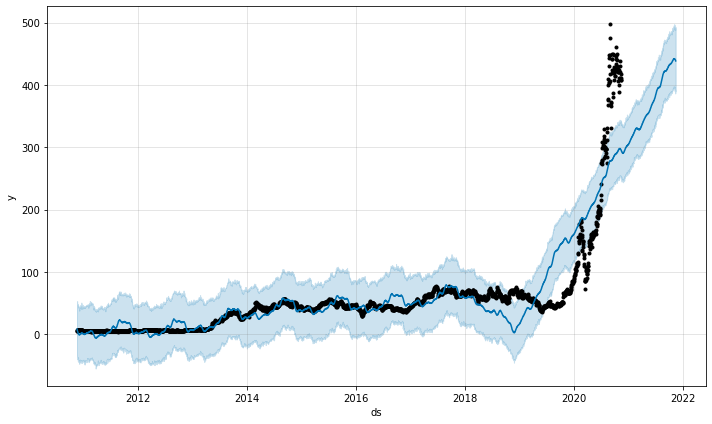

In [31]:
m.plot(forecast);

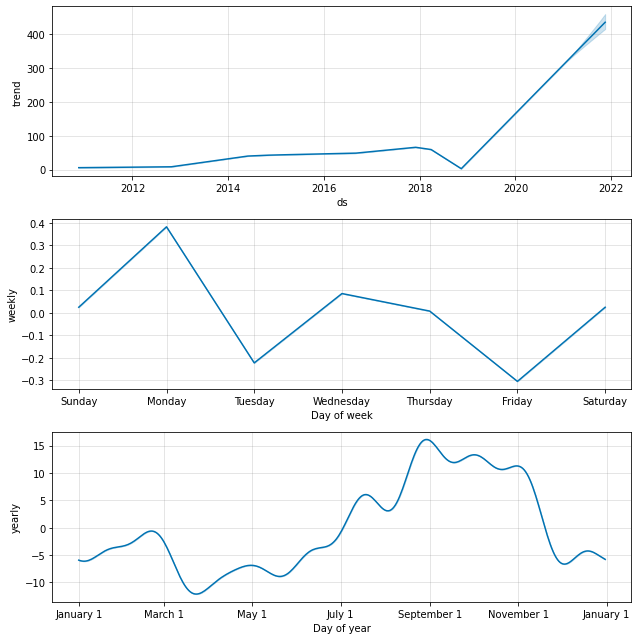

In [32]:
m.plot_components(forecast);

In [33]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Examine our components

**Chart 1:** In first chart, at the level of years, it is illustrated from the previous chart, the stocks show rapidly increased for next two years. Moreover, this outcome may showing good results for investment around the worlds.

**Chart 2:** In second chart, during the weekdays on Monday, it is witnessing a high increase compared to the rest of the week.

**Chart 3:** In third chart Tesla's stock will increase in September and then decrease significantly in Novamber. In general we obtain that the stock has unstable state.


Cross validate our forecast

In [34]:
from fbprophet.diagnostics import cross_validation

cross_validation(m, initial='90 days', period='90 days', horizon='180 days')

INFO:fbprophet:Making 38 forecasts with cutoffs between 2011-04-08 00:00:00 and 2020-05-20 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-04-11,5.137250,4.911157,5.380531,5.054000,2011-04-08
1,2011-04-12,5.213276,4.963186,5.449301,4.930000,2011-04-08
2,2011-04-13,5.376381,5.131575,5.609534,4.986000,2011-04-08
3,2011-04-14,5.594710,5.358012,5.836275,5.028000,2011-04-08
4,2011-04-15,5.973995,5.734097,6.210266,5.116000,2011-04-08
...,...,...,...,...,...,...
4707,2020-11-10,109.045929,92.062014,125.927481,410.359985,2020-05-20
4708,2020-11-11,109.050583,91.997821,125.970254,417.130005,2020-05-20
4709,2020-11-12,108.984323,92.035485,127.048092,411.760010,2020-05-20
4710,2020-11-13,108.822459,91.974848,126.440187,408.500000,2020-05-20


In [35]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, 
                         initial='1825 days',  # 5 years to start 
                         period='180 days',  # then make a prediction every 6 months 
                         horizon='365 days'  # predict a whole year each prediction
                         )
df_cv

INFO:fbprophet:Making 9 forecasts with cutoffs between 2015-12-08 00:00:00 and 2019-11-17 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-12-09,44.104876,40.405843,47.364993,44.903999,2015-12-08
1,2015-12-10,44.095211,40.601324,47.414036,45.414001,2015-12-08
2,2015-12-11,44.035798,40.491108,47.906948,43.403999,2015-12-08
3,2015-12-14,43.936447,40.330148,47.543728,43.716000,2015-12-08
4,2015-12-15,44.006711,40.196869,47.914522,44.217999,2015-12-08
...,...,...,...,...,...,...
2260,2020-11-10,40.321668,29.127276,51.629485,410.359985,2019-11-17
2261,2020-11-11,40.172654,29.317868,51.572099,417.130005,2019-11-17
2262,2020-11-12,40.002752,29.373372,51.461880,411.760010,2019-11-17
2263,2020-11-13,39.713646,28.749645,51.137148,408.500000,2019-11-17


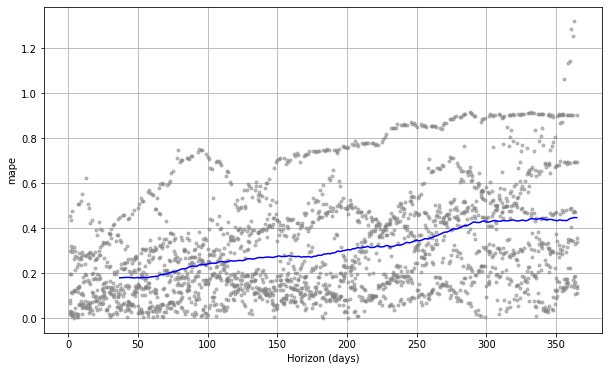

In [37]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv, metric='mape');